In [40]:
# For file system manipulation
from pathlib import Path

# Python IO for ROOT files
import uproot

# IO for yaml files
import yaml

# To render latex in prints
from IPython.display import display, Latex

# Numpy for array manipulation
import numpy as np

# For interactive plotting
import matplotlib.pyplot as plt
from matplotlib import patches
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Seaborn for plotting and styling
import seaborn as sns

# Pandas for data frame manipulation
import pandas as pd

# Utilities for extracting information from the data saved in the ROOT files
from utils.data_processing import (
    get_branch_entry,
    make_track_dict,
    get_all_mother_ids,
    get_process_ids,
    get_process_tex_str,
    is_signal_particle,
)

# Utilities for plotting
from utils.plotting import plot_stt, create_rotated_cross

In [41]:
new_particle_data_path_name = "/home/nikin105/mlProject/data/simulations/new_XiAntiXi/processed/full_particle_info.parquet"

# Check if the file exists
new_particle_data_path = Path(new_particle_data_path_name)
if new_particle_data_path.is_file():
    print(f"File {new_particle_data_path} exists.")
else:
    raise FileNotFoundError(f"File {new_particle_data_path} does not exist.")

new_particle_data = pd.read_parquet(new_particle_data_path_name)
new_particle_data["version"] = "new"
new_particle_data

File /home/nikin105/mlProject/data/simulations/new_XiAntiXi/processed/full_particle_info.parquet exists.


,MCTrack.fPx,MCTrack.fPy,MCTrack.fPz,MCTrack.fPdgCode,is_signal,particle_name,production_process,pt,P,theta,phi,eta,version
0,0.299058,0.511845,2.059850,2212,True,$p$,Decay,0.592808,2.143456,0.280219,1.042020,1.958757,new
1,0.117050,0.210799,0.810537,-211,True,$\pi^-$,Decay,0.241116,0.845640,0.289140,1.063919,1.926991,new
2,-0.368361,-0.439230,1.167706,-2212,True,$\bar{p}$,Decay,0.573247,1.300827,0.456355,-2.268665,1.460062,new
3,-0.000880,0.001329,-0.000558,11,False,$e^-$,No active process,0.001594,0.001689,1.907701,2.155804,-0.343465,new
4,-0.042360,-0.207829,0.256852,211,True,$\pi^+$,Decay,0.212102,0.333107,0.690262,-1.771865,1.022985,new
...,...,...,...,...,...,...,...,...,...,...,...,...,...
511632,0.112563,0.166790,0.273296,-211,True,$\pi^-$,Decay,0.201220,0.339382,0.634656,0.977130,1.113442,new
511633,-0.095215,0.128065,0.179860,13,False,$\mu^-$,Decay,0.159582,0.240450,0.725730,2.210119,0.968434,new
511634,-0.070206,0.087047,0.219343,-211,True,$\pi^-$,Decay,0.111830,0.246206,0.471491,2.249512,1.426233,new
511635,-0.466687,-0.561307,1.381751,-2212,True,$\bar{p}$,Decay,0.729975,1.562722,0.486028,-2.264410,1.394676,new


In [42]:
old_particle_data_path_name = "/home/nikin105/mlProject/data/simulations/XiAntiXi/processed/particle_data.parquet"

# Check if the file exists
old_particle_data_path = Path(old_particle_data_path_name)
if old_particle_data_path.is_file():
    print(f"File {old_particle_data_path} exists.")
else:
    raise FileNotFoundError(f"File {old_particle_data_path} does not exist.")

old_particle_data = pd.read_parquet(old_particle_data_path_name)
old_particle_data["version"] = "old"
old_particle_data

File /home/nikin105/mlProject/data/simulations/XiAntiXi/processed/particle_data.parquet exists.


,MCTrack.fPx,MCTrack.fPy,MCTrack.fPz,MCTrack.fPdgCode,is_signal,particle_name,production_process,pt,P,theta,phi,eta,version
0,0.075377,0.006584,0.040126,211,True,$\pi^+$,Primary particle emission,0.075664,0.085645,1.083189,0.087123,0.508164,old
1,0.205687,-0.609657,0.961560,-2212,True,$\bar{p}$,Primary particle emission,0.643420,1.156973,0.589714,-1.245407,1.191682,old
2,0.006452,-0.102394,0.325341,211,True,$\pi^+$,Primary particle emission,0.102597,0.341135,0.305481,-1.507868,1.871197,old
3,0.044067,0.102345,0.189068,-211,True,$\pi^-$,Primary particle emission,0.111429,0.219461,0.532559,1.164215,1.299175,old
4,-0.248103,0.447883,2.728664,2212,True,$p$,Primary particle emission,0.512010,2.776285,0.185484,2.076665,2.375059,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...
625536,-0.000001,-0.000022,0.000010,11,False,$e^-$,Nuclear absorption,0.000022,0.000024,1.131373,-1.621689,0.454288,old
625537,0.000003,-0.000012,0.000010,11,False,$e^-$,Nuclear absorption,0.000012,0.000016,0.894983,-1.302099,0.734042,old
625538,0.000011,-0.000006,0.000006,11,False,$e^-$,Nuclear absorption,0.000013,0.000014,1.155715,-0.531492,0.427541,old
625539,0.000002,0.000004,0.000011,11,False,$e^-$,Nuclear absorption,0.000004,0.000012,0.372583,1.050141,1.668781,old


In [43]:
project_name = "XiAntiXi_comparison"
ml_project_image_path = "/home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/"
event_image_path_name = ml_project_image_path + project_name + "/sim/event"
event_image_path = Path(event_image_path_name)

# Check if the directory already exists
if not event_image_path.exists():
    event_image_path.mkdir(parents=True)  # Create a new directory
    print(f"Directory {event_image_path} created.")
else:
    print(f"Directory {event_image_path_name} already exists.")

distributions_image_path_name = ml_project_image_path + project_name + "/sim/distributions"
distributions_image_path = Path(distributions_image_path_name)

# Check if the directory already exists
if not distributions_image_path.exists():
    distributions_image_path.mkdir(parents=True)  # Create a new directory
    print(f"Directory {distributions_image_path} created.")
else:
    print(f"Directory {distributions_image_path} already exists.")

Directory /home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/XiAntiXi_comparison/sim/event already exists.
Directory /home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/XiAntiXi_comparison/sim/distributions already exists.


In [61]:
full_df = pd.concat([old_particle_data, new_particle_data], ignore_index=True)
full_df["cos_theta"] = np.cos(full_df["theta"])

Saving png image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/XiAntiXi_comparison/sim/distributions/pt_counts.png
Saving pdf image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/XiAntiXi_comparison/sim/distributions/pt_counts.pdf


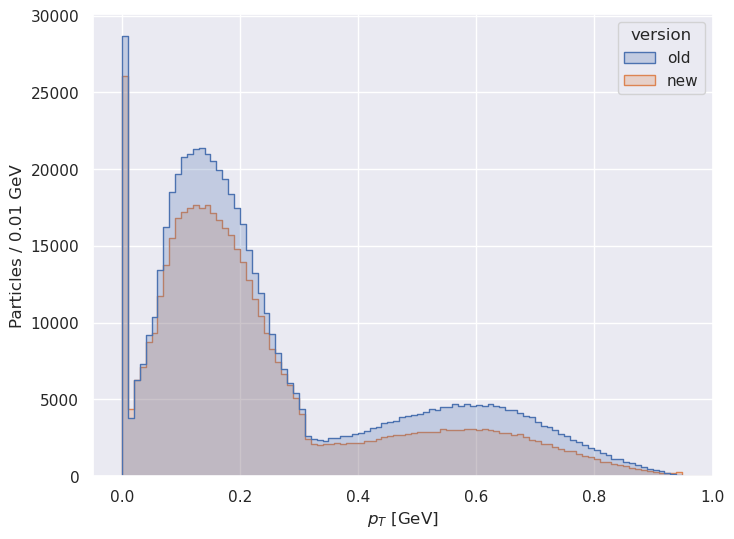

In [80]:
plt.close("all")
sns.set_theme()
sns.set_color_codes()
sns.set_context("notebook")
bin_width = 0.01
figure, ax = plt.subplots(figsize=(8, 6))
sns.histplot(
    data=full_df,
    x="pt",
    hue="version",
    element="step",
    ax=ax,
    binwidth=bin_width,
    stat="count",
)
ax.set_xlim(-0.05, 1)
ax.set_xlabel(r"$p_T$ [GeV]")
ax.set_ylabel(f"Particles / {bin_width} GeV")

# Set the image path and name and save the image as a png and pdf
image_prefix = distributions_image_path_name + "/pt_counts"
print("Saving png image to: ", image_prefix + ".png")
plt.savefig(image_prefix + ".png", dpi=300, bbox_inches="tight")
print("Saving pdf image to: ", image_prefix + ".pdf")
plt.savefig(image_prefix + ".pdf", dpi=300, bbox_inches="tight")

Saving png image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/XiAntiXi_comparison/sim/distributions/pt.png
Saving pdf image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/XiAntiXi_comparison/sim/distributions/pt.pdf


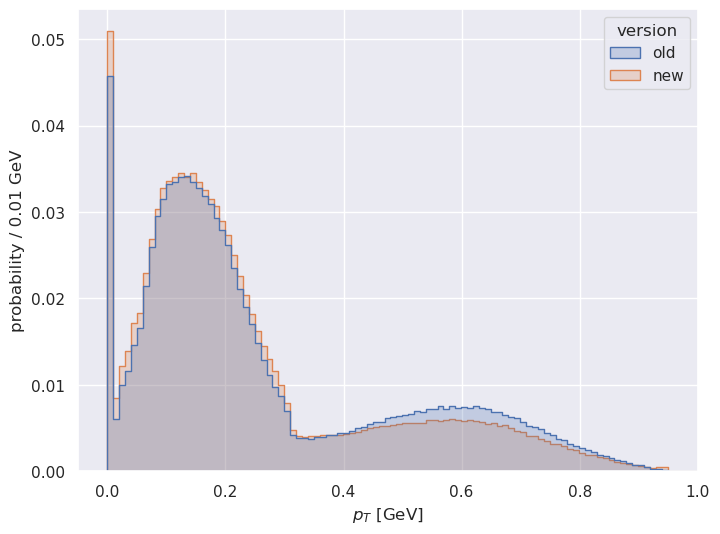

In [75]:
plt.close("all")
sns.set_theme()
sns.set_color_codes()
sns.set_context("notebook")
bin_width = 0.01
figure, ax = plt.subplots(figsize=(8, 6))
sns.histplot(
    data=full_df,
    x="pt",
    hue="version",
    element="step",
    ax=ax,
    binwidth=bin_width,
    stat="probability",
    common_norm=False,
)
ax.set_xlim(-0.05, 1)
ax.set_xlabel(r"$p_T$ [GeV]")
ax.set_ylabel(f"probability / {bin_width} GeV")

# Set the image path and name and save the image as a png and pdf
image_prefix = distributions_image_path_name + "/pt"
print("Saving png image to: ", image_prefix + ".png")
plt.savefig(image_prefix + ".png", dpi=300, bbox_inches="tight")
print("Saving pdf image to: ", image_prefix + ".pdf")
plt.savefig(image_prefix + ".pdf", dpi=300, bbox_inches="tight")

Saving png image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/XiAntiXi_comparison/sim/distributions/cos_theta.png
Saving pdf image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/XiAntiXi_comparison/sim/distributions/cos_theta.pdf


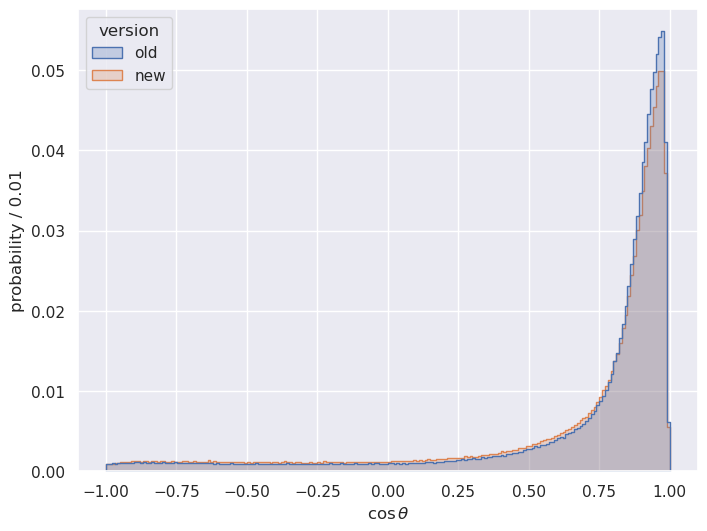

In [86]:
plt.close("all")
sns.set_theme()
sns.set_color_codes()
sns.set_context("notebook")
bin_width = 0.01
figure, ax = plt.subplots(figsize=(8, 6))
sns.histplot(
    data=full_df,
    x="cos_theta",
    hue="version",
    element="step",
    ax=ax,
    binwidth=bin_width,
    stat="probability",
    common_norm=False,
)
ax.set_xlabel(r"$\cos{\theta}$")
ax.set_ylabel(f"probability / {bin_width}")
sns.move_legend(ax, "upper left")

# Set the image path and name and save the image as a png and pdf
image_prefix = distributions_image_path_name + "/cos_theta"
print("Saving png image to: ", image_prefix + ".png")
plt.savefig(image_prefix + ".png", dpi=300, bbox_inches="tight")
print("Saving pdf image to: ", image_prefix + ".pdf")
plt.savefig(image_prefix + ".pdf", dpi=300, bbox_inches="tight")

Saving png image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/XiAntiXi_comparison/sim/distributions/phi.png
Saving pdf image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/XiAntiXi_comparison/sim/distributions/phi.pdf


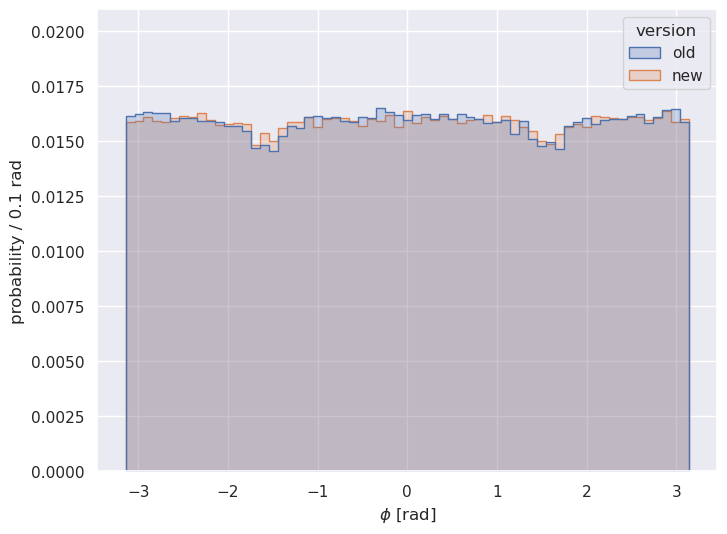

In [90]:
plt.close("all")
sns.set_theme()
sns.set_color_codes()
sns.set_context("notebook")
bin_width = 0.1
figure, ax = plt.subplots(figsize=(8, 6))
sns.histplot(
    data=full_df,
    x="phi",
    hue="version",
    element="step",
    ax=ax,
    binwidth=bin_width,
    stat="probability",
    common_norm=False,
)
ax.set_xlabel(r"$\phi$ [rad]")
ax.set_ylabel(f"probability / {bin_width} rad")
ax.set_ylim(None, 0.021)

# Set the image path and name and save the image as a png and pdf
image_prefix = distributions_image_path_name + "/phi"
print("Saving png image to: ", image_prefix + ".png")
plt.savefig(image_prefix + ".png", dpi=300, bbox_inches="tight")
print("Saving pdf image to: ", image_prefix + ".pdf")
plt.savefig(image_prefix + ".pdf", dpi=300, bbox_inches="tight")